# Airbnb Pricing Prediction

Problem Statement: The project aims to predict the price of Airbnb listings from the     given number of features in the dataset



# Table of Contents

1. Data Preview
2. Data Exploration and Visulization
3. Data Cleaning
4. Train and Test Split
5. Building Pipleline
6. Modeling Techniques
7. Tuning the models
8. Evaluate final model on the Test Set
9. References

# Data Preview

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/Shareddrives/810-Teamproject/train.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* The dataset has 74111 rows, and 29 columns
* The dataset have mixed types of Numeric, Category, Date, String

| Column title| Data Type   |Description|
| :----------- | :----------- | :--------|
| `ID`       | Categorical      |Unique identifier given to each property listing       |
| `Log Price`         |Numeric| Logged price of each Airbnb property |
| `Property_Type` |Categorical| Type of housing, i.e. apartment, single-family home, etc |
| `Room_Type`       |Categorical|Is the property going to be shared with the host, or will the guests be on property on their own                        |
| `Amenities`    | Dictionary| Features being offered by the property, such as Internet, Cable, Free Parking, or any other items that add value to the guest experience                      |
| `Accommodates `       | Numeric|Maximum number of guests that can stay on the property              |
| `Bathrooms`       | Numeric| Number of bathrooms that the property offers |
| `Bed_Type`     | Categorical| The type of bed that is offered, i.e. sofa bed, real bed, or futon |
| `Cancellation_Policy` |Categorical| The flexibility levels being offered by hosts if a guest was to cancel their reservation, i.e. strict, moderate, or flexible |
| `Cleaning_Fee`  | Categorical|Whether or not their is a cleaning fee included in the price |
| `City`  | Categorical|The city where the property is located |
| `Description `  |Categorical| Brief summary of the property, such as the space, the amenities, local attractions, etc |
| `First_Review`  |Date |The date of the first review that was written for each property |
| `Host_Has_Profile_Pic`  | Categorical| Whether the property’s host has a profile picture|
| `Host_Identity_Verified `  | Categorical|Whether the host has taken the necessary steps to verify their account with Airbnb, such as providing an ID and sending a picture of themselves so that Airbnb could check against the ID to make sure they are who they say they are |
| `Host_Response_Rate`  | Numeric |Percentage of guest inquiries that the host replies back to out of the total number of guest inquiries |
| `Host_Since `  | Date| The year that the host joined Airbnb as a designated host |
| `Instant_Bookable`  |Categorical| Whether the property can be booked right away, or if the guest would require the host to accept the booking before the reservation is confirmed|
| `Last_Review `  | Date| Date of the most recent review|
| `Latitude  `  | Numeric|The exact latitudinal points on a map of a specific property |
| `Longitude`  | Numeric|(The exact longitudinal points on a map of a specific property |
| `Name `  | Categorical| Listing name given to the property |
| `Neighbourhood`  |Categorical| Small area within a city, i.e. Brookline is a neighborhood in Boston |
| `Number_Of_Reviews  `  | Numeric|The total number of guest reviews given on each individual property |
| `Review_Scores_Rating`  | Numeric|Average of the ratings given by the guests for each property |
| `Thumbnail_URL `  | Categorical| Link that will bring you directly to the photos of the property|
| `Zip Code`  |Categorical| Series of numbers used to distinguish addresses in geographic groupings |
| `Bedrooms `  | Numeric|Total number of bedrooms that the property contains |
| `Beds `  | Numeric| Total number of beds that the property offers |



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

We decided to drop some columns, the reasons why are as follows:
1. *id* column is not helpful in predicting the price
2. *description* is a column with long text about the description on what the Airbnb might include. Text analysis is something we haven't covered in class yet
3. *neighborhood* & *zipcode* have missing values and hence are redundant as we have longitude and latitude, so we decided to mainly use *longitude* and *latitude* to predict instead
4. *thumbnail_url* are  links to access the picture of Airbnb, which includes image analysis, which we haven't covered in class
5. *amenities* has unlimited value in the dictionary, and it includes text handing. This is something else which we haven't covered in class, so we decided to drop it.

In [ ]:
data = data.drop(['id','description','name','neighbourhood','thumbnail_url','zipcode','amenities'],axis=1)

In [ ]:
data.head()

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,first_review,...,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.01064,Apartment,Entire home/apt,3,1.00000,Real Bed,strict,True,NYC,2016-06-18,...,NaN,2012-03-26,f,2016-07-18,40.69652,-73.99162,2,100.00000,1.00000,1.00000
1,5.12990,Apartment,Entire home/apt,7,1.00000,Real Bed,strict,True,NYC,2017-08-05,...,100%,2017-06-19,t,2017-09-23,40.76612,-73.98904,6,93.00000,3.00000,3.00000
2,4.97673,Apartment,Entire home/apt,5,1.00000,Real Bed,moderate,True,NYC,2017-04-30,...,100%,2016-10-25,t,2017-09-14,40.80811,-73.94376,10,92.00000,1.00000,3.00000
3,6.62007,House,Entire home/apt,4,1.00000,Real Bed,flexible,True,SF,NaN,...,NaN,2015-04-19,f,NaN,37.77200,-122.43162,0,NaN,2.00000,2.00000
4,4.74493,Apartment,Entire home/apt,2,1.00000,Real Bed,moderate,True,DC,2015-05-12,...,100%,2015-03-01,t,2017-01-22,38.92563,-77.03460,4,40.00000,0.00000,1.00000


# Data Exploration and Visualization

Summary statistic of Categorical variables

In [ ]:
data.describe(include=object)

,property_type,room_type,bed_type,cancellation_policy,city,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review
count,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284
unique,35,3,5,5,6,2554,2,2,80,3087,2,1371
top,Apartment,Entire home/apt,Real Bed,strict,NYC,2017-01-01,t,t,100%,2015-03-30,f,2017-04-30
freq,49003,41310,72028,32374,32349,293,73697,49748,43254,246,54660,1344


Summary statistics of Numerical variables

In [ ]:
data.describe()

,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.00000,74111.00000,73911.00000,74111.00000,74111.00000,74111.00000,57389.00000,74020.00000,73980.00000
mean,4.78207,3.15515,1.23526,38.44596,-92.39753,20.90057,94.06736,1.26579,1.71087
std,0.71739,2.15359,0.58204,3.08017,21.70532,37.82864,7.83656,0.85214,1.25414
min,0.00000,1.00000,0.00000,33.33890,-122.51150,0.00000,20.00000,0.00000,0.00000
25%,4.31749,2.00000,1.00000,34.12791,-118.34237,1.00000,92.00000,1.00000,1.00000
50%,4.70953,2.00000,1.00000,40.66214,-76.99696,6.00000,96.00000,1.00000,1.00000
75%,5.22036,4.00000,1.00000,40.74610,-73.95466,23.00000,100.00000,1.00000,2.00000
max,7.60040,16.00000,8.00000,42.39044,-70.98505,605.00000,100.00000,10.00000,18.00000


Target Variable: *log_price*

We aim to use the above Airbnb dataset to predict the log price of each individual listing based on the given variables in the data. We plotted the distribution plot for the target variable to check how distributed the prices are, and found that since we are using the log of prices, the values follow close to normal distribution. The log value makes it a better metric for prediction.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



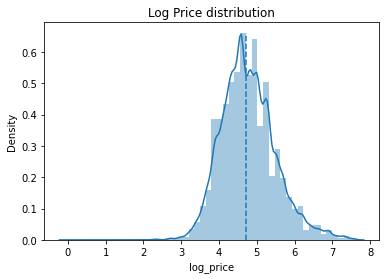

In [ ]:
sns.distplot(data['log_price'])
plt.axvline(data['log_price'].median(), ymax= 0.95, linestyle='--')
plt.title('Log Price distribution')
plt.show();

The below graph represents the count of airbnb listings in each city in the dataset considered. We can observe that New York City and Los Angeles have a higher number of airbnb listings as compared to other major cities in the US

In [ ]:
data.city.value_counts()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

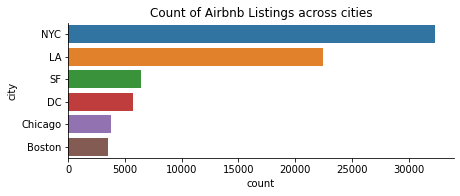

In [ ]:
ax = sns.catplot(y="city", kind="count", data=data, height=2.6,order=data['city'].value_counts().index,aspect=2.5).set(title='Count of Airbnb Listings across cities')

In [ ]:
!pip install ipywidgets
import ipywidgets as widgets
from ipywidgets import *

Geographic plot of Airbnb locations and their *log_prices* plotted for various cities. The brighter color (yellow) of the dots indicate higher priced properties and a darker color (blue) indicates lower priced properties.

In [ ]:
import plotly.express as px
def create_map(city):
    price_view = lambda x: 'price: ' + str(round(x, 2))

    if city in {'NYC', 'LA'}:
        fraction = 0.2
    else:
        fraction = 0.6

    df_temp = data[data['city'] == city].sample(frac=fraction,random_state=101)
    df_temp['log_price'] = np.round(df_temp['log_price'], 2)

    fig = px.scatter_mapbox(df_temp,
                            lat="latitude",
                            lon="longitude",
                            hover_data=["log_price"],
                            color='log_price',
                            zoom=10)

    fig.update_layout(
            title = f'Airbnb prices in {city}',
            geo_scope='usa',
            width=1000,
            height=600,
            mapbox_style="white-bg",
            mapbox_layers=[{
                 "below": 'traces',
                 "sourcetype": "raster",
                 "sourceattribution": "United States Geological Survey",
                 "source": ["https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"]
              }]
    )
    #fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    #fig.update_geos(fitbounds="locations")
    fig.show()

city = interact(lambda Choose_city: create_map(Choose_city), Choose_city=['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'])  #widget

interactive(children=(Dropdown(description='Choose_city', options=('NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston…

While trying to analze the common property types we found that Apartment and House are the two most common types of Properties listed in Airbnb.

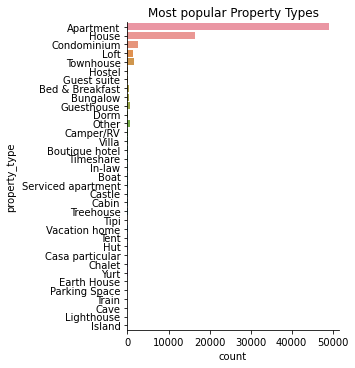

In [ ]:
ax = sns.catplot(y="property_type", kind="count",data=data).set(title='Most popular Property Types')

Now we will explore the correlation among the variables, along with the target variable.

In [ ]:
data.corr()

,log_price,accommodates,bathrooms,cleaning_fee,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
log_price,1.00000,0.56757,0.35542,0.11119,-0.00219,-0.04753,-0.03247,0.09122,0.47321,0.44215
accommodates,0.56757,1.00000,0.50563,0.18231,-0.07831,-0.08516,0.04196,-0.01713,0.70926,0.81080
bathrooms,0.35542,0.50563,1.00000,0.05378,-0.13796,-0.13503,-0.04138,0.01054,0.58994,0.52559
cleaning_fee,0.11119,0.18231,0.05378,1.00000,-0.06091,-0.06850,0.11020,0.03488,0.10545,0.13163
latitude,-0.00219,-0.07831,-0.13796,-0.06091,1.00000,0.89606,-0.01764,-0.03286,-0.05916,-0.08029
longitude,-0.04753,-0.08516,-0.13503,-0.06850,0.89606,1.00000,-0.05001,-0.04880,-0.07611,-0.08215
number_of_reviews,-0.03247,0.04196,-0.04138,0.11020,-0.01764,-0.05001,1.00000,0.01171,-0.03515,0.03111
review_scores_rating,0.09122,-0.01713,0.01054,0.03488,-0.03286,-0.04880,0.01171,1.00000,0.01114,-0.02733
bedrooms,0.47321,0.70926,0.58994,0.10545,-0.05916,-0.07611,-0.03515,0.01114,1.00000,0.70942
beds,0.44215,0.81080,0.52559,0.13163,-0.08029,-0.08215,0.03111,-0.02733,0.70942,1.00000


The below heatmap is showing the correlation that each individual variable has with one another. In terms of log price, the variable that has the lowest correlation with it is longitude with a value of -0.05. The variable that had the highest correlation with log price was accommodates with a value of 0.57.

In [ ]:
import plotly.figure_factory as ff
figure = ff.create_annotated_heatmap(
    z=data.corr().values,
    x=list(data.corr().columns),
    y=list(data.corr().index),
    annotation_text=data.corr().round(2).values,
    showscale=True)
figure.show()

Visualizing the relationship using pairplot with the most correlated values with *log_price*. We observe that there is no strong linear relationship of the targert variable with other numeric variables

<Figure size 432x288 with 0 Axes>

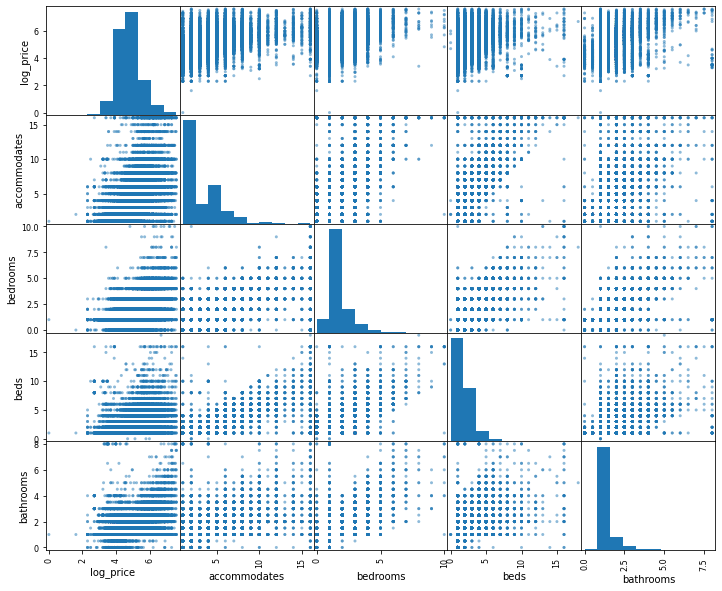

In [ ]:
from pandas.plotting import scatter_matrix
plt.clf()
attributes=['log_price', 'accommodates','bedrooms', 'beds','bathrooms']
scatter_matrix(data[attributes], figsize=(12, 10))
plt.show()

As accomodates seems to have the highest correlation as compared to other variables, this graph shows how the log price is affected by the number of bedrooms that a property contains. As can be seen, the more bedrooms being offered, the higher the log price.

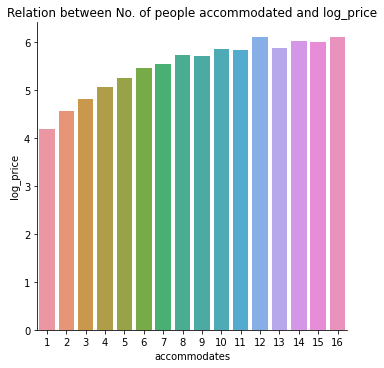

In [ ]:
sns.catplot(x='accommodates', y= 'log_price', data=data, kind='bar', ci= None).set(title='Relation between No. of people accommodated and log_price')
plt.show()

# Data cleaning

*   Converted datatype:
      - Change 3 string type columns to Date type
      - Change 1 string type column to numeric by removing the % sign

*   Created two new columns :
    - gap_between_Hostsince_Firstreview
    - gap_between_Hostsince_Lastreview
*   Droped certain columns
*   Checked count of missing values

In [ ]:
data['host_response_rate'].head()

0     NaN
1    100%
2    100%
3     NaN
4    100%
Name: host_response_rate, dtype: object

We need to remove the % sign from host_response_rate and make it a numeric data

In [ ]:
data['host_response_rate'] = data['host_response_rate'].str.rstrip('%').astype('float') / 100.0

We need to convert the columns host_since, first_review, last_review to date type.  
Also we added two more columns which were gap_between_Hostsince_Firstreview and gap_between_Hostsince_Lastreview that do the difference between the three columns.
- gap_between_Hostsince_Firstreview = first_review - host_since  
It is made trying to see how long it takes for an airbnb host to get their first review, which could be a rough reference of how long it took for them to get the first customer.
- gap_between_Hostsince_Lastreview = last_review - host_since  
It is made trying to see the difference between the host date and the recent date to get a customer review, which could be a rough reference of how long the airbnb owner has been hosting

In [ ]:
data['host_since'] = pd.to_datetime(data['host_since'])
data['first_review'] = pd.to_datetime(data['first_review'])
data['last_review'] = pd.to_datetime(data['last_review'])

data['gap_between_Hostsince_Firstreview'] = (data['first_review'] - data['host_since']).dt.days
data['gap_between_Hostsince_Lastreview'] = (data['last_review'] - data['host_since']).dt.days

We decided to drop the host_since, first_review, last_review columns, otherwise they will be treated as categorical data in pipeline.

In [ ]:
data = data.drop(['first_review','host_since','last_review'],axis=1)

Finally we get 21 columns and 9 of them have missing value that are ready to go into the pipeline.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   log_price                          74111 non-null  float64
 1   property_type                      74111 non-null  object 
 2   room_type                          74111 non-null  object 
 3   accommodates                       74111 non-null  int64  
 4   bathrooms                          73911 non-null  float64
 5   bed_type                           74111 non-null  object 
 6   cancellation_policy                74111 non-null  object 
 7   cleaning_fee                       74111 non-null  bool   
 8   city                               74111 non-null  object 
 9   host_has_profile_pic               73923 non-null  object 
 10  host_identity_verified             73923 non-null  object 
 11  host_response_rate                 55812 non-null  flo

In [ ]:
data.isna().sum()

log_price                                0
property_type                            0
room_type                                0
accommodates                             0
bathrooms                              200
bed_type                                 0
cancellation_policy                      0
cleaning_fee                             0
city                                     0
host_has_profile_pic                   188
host_identity_verified                 188
host_response_rate                   18299
instant_bookable                         0
latitude                                 0
longitude                                0
number_of_reviews                        0
review_scores_rating                 16722
bedrooms                                91
beds                                   131
gap_between_Hostsince_Firstreview    16010
gap_between_Hostsince_Lastreview     15979
dtype: int64

#Train Test Split
Split 20% of data as training set and 80% of data as testing set

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(59288, 14823)

In [ ]:
X_train = train_set.drop("log_price", axis=1)
y_train = train_set["log_price"].copy()

X_test = test_set.drop("log_price", axis=1)
y_test = test_set["log_price"].copy()

# Building Pipeline
We will build a preprocessing pipeline that contains three pipelines which can deal with numeric data, categorical, and centers clustering by using longitude and latitude columns separately.

In [ ]:
# import library
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

    if not hasattr(IterativeImputer, "get_feature_names_out"):
      print("Monkey-patching IterativeImputer.get_feature_names_out()")
      IterativeImputer.get_feature_names_out = default_get_feature_names_out

monkey_patch_get_signature_names_out()

In [ ]:
from sklearn import set_config
set_config(display='diagram')

## General numeric and categorical pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['accommodates','bathrooms','number_of_reviews','review_scores_rating','bedrooms','beds','bathrooms','host_response_rate','gap_between_Hostsince_Firstreview','gap_between_Hostsince_Lastreview']
cat_attribs = ['property_type','room_type','bed_type','cancellation_policy','cleaning_fee','city','host_has_profile_pic','host_identity_verified','instant_bookable']



num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))



## Pipeline that cluster longtitude and latitude to several centers

Then build a geographic pipeline with centers clustering , and we made the number of clustering to 6 as there are 6 major cities in dataset.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  # These two super classes provide get/set methods and fit_transform
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=6, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(X_train[["latitude", "longitude"]],
                                           sample_weight=y_train)

## Combine the three main sub pipelines to one

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
        ("geo", cluster_simil, ["latitude", "longitude"]),
    ],
    )

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['accommodates', 'bathrooms',
                                  'number_of_reviews', 'review_scores_rating',
                                  'bedrooms', 'beds', 'bathrooms',
                                  'host_response_rate',
                                  'gap_between_Hostsince_Firstreview',
                                  'gap_between_Hostsince_Lastreview']),
                                ('cat',
                                 Pipe...simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['property_type', 'room_type', 'bed_type',
                                  'cancellation_policy', 'cleaning_fee', 'city',
                                  'host_has_profile_pic',
                                  'host_identity_verified',
                                  'instant_bookable']),
                                ('geo',
                                 ClusterSimilarity(n_clusters=6,
                                                   random_state=42),
                                 ['latitude', 'longitude'])])

Test if the pipeline is working well.



In [ ]:
preprocessing.fit_transform(X_train)

array([[ 3.93753438e-01,  4.54601011e-01, -2.35462031e-01, ...,
         0.00000000e+00,  4.79662981e-14,  0.00000000e+00],
       [-5.34969886e-01, -4.04904849e-01, -3.93564429e-01, ...,
         2.65678918e-83,  0.00000000e+00,  3.14235863e-05],
       [ 3.93753438e-01, -4.04904849e-01, -4.46265229e-01, ...,
         5.72077228e-83,  0.00000000e+00,  2.04367512e-05],
       ...,
       [ 8.58115100e-01,  1.31410687e+00, -2.46588328e-02, ...,
         0.00000000e+00,  6.89612007e-14,  0.00000000e+00],
       [-5.34969886e-01, -4.04904849e-01, -5.51666828e-01, ...,
         7.00828394e-83,  0.00000000e+00,  2.21713511e-05],
       [-5.34969886e-01, -4.04904849e-01, -4.72615628e-01, ...,
         0.00000000e+00,  2.92679304e-14,  0.00000000e+00]])

In [ ]:
preprocessing.get_feature_names_out()

array(['num__accommodates', 'num__bathrooms', 'num__number_of_reviews',
       'num__review_scores_rating', 'num__bedrooms', 'num__beds',
       'num__bathrooms', 'num__host_response_rate',
       'num__gap_between_Hostsince_Firstreview',
       'num__gap_between_Hostsince_Lastreview',
       'cat__property_type_Apartment',
       'cat__property_type_Bed & Breakfast', 'cat__property_type_Boat',
       'cat__property_type_Boutique hotel', 'cat__property_type_Bungalow',
       'cat__property_type_Cabin', 'cat__property_type_Camper/RV',
       'cat__property_type_Casa particular', 'cat__property_type_Castle',
       'cat__property_type_Cave', 'cat__property_type_Chalet',
       'cat__property_type_Condominium', 'cat__property_type_Dorm',
       'cat__property_type_Earth House', 'cat__property_type_Guest suite',
       'cat__property_type_Guesthouse', 'cat__property_type_Hostel',
       'cat__property_type_House', 'cat__property_type_Hut',
       'cat__property_type_In-law', 'cat__property

# Modeling Techniques

*   After being done with the pipeline, we are now ready to build up the regression model. Our group build up 8 models and compared their performance by comparing them with root mean square error

*   For each model, our group run the error from both the training dataset and the test set of cross-validation on the training set. But we only evaluate the test error to select the best model

### Linear Regression

We first try the linear Regression model as it is one of the most basic regression models, and got the training error is 0.46588, but the testing error is 25918537.99104. This is quite unusual as the test data error is much higher as compared to train data error. We speculate this may happen due to linear regression without regularization, which may cause instability especially when columns are very correlated with each other, or near duplicates.

We will later try Lasso and Ridge Regressor to see if the model performance will improve with the regulation involved.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(X_train, y_train)
price_predictions_linear = lin_reg.predict(X_train)
lin_rmse = mean_squared_error(y_train, price_predictions_linear, squared=False)
print('Training data error {:.5f}'.format(lin_rmse))

lin_test_rmses = -cross_val_score(lin_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)

print('Test data error for linear regression {:.5f}'.format(lin_test_rmses.mean()))

print('R^2 for linear regression {:.5f}'.format( r2_score(y_train, price_predictions_linear)))


Training data error 0.46588
Test data error for linear regression 25918537.99104
R^2 for linear regression 0.57845


### Linear Lasso Regression

Let's try how Linear Lasso Regression with cross-validation, as Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights. The absolute values of weight will be reduced, and many will tend to be zeros.

We can see that the mse in the training set is  0.55549, and the mse in the testset using cross-validation method is 0.55557. The unexpectedly high rmse value in Linear Regression Model is resolved using the Linear Lasso Regression.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score

lasso_reg = make_pipeline(preprocessing, LassoCV(alphas=(.1, 1, 10)))
lasso_reg.fit(X_train, y_train)
lasso_predictions = lasso_reg.predict(X_train)
lasso_rmse = mean_squared_error(y_train, lasso_predictions, squared=False)
print('Training data error {:.5f}'.format(lasso_rmse))
lasso_test_rmses = -cross_val_score(lasso_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(lasso_test_rmses.mean()))


Training data error 0.55549
Test data error 0.55557


### Linear Ridge regression



The difference between Lasso and Ridge regression is that Ridge regression decreases the complexity of a model but does not reduce the number of variables since it never leads to a coefficient been zero but rather only minimizes it.

Let's try using Linear Tree Lasso Regression to perform.
We can see that the MSE in training set is  0.46746, and the MSE in test set using cross validation method is 0.46851. The two errors are quite similar but the performance is better than linear regression.

Ridge Regression has better performance than Lasso Regression, as it has a lower RMSE score. The reason may because there are many large parameters of about the same value, when most predictors impact the response. So we speculate that there may be many features they all have significant impact to the housing prediction.




In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

ridge_reg = make_pipeline(preprocessing, RidgeCV(alphas=(.1, 1, 10)))
ridge_reg.fit(X_train, y_train)
ridge_predictions = ridge_reg.predict(X_train)
ridge_rmse = mean_squared_error(y_train, ridge_predictions, squared=False)
print('Training data error {:.5f}'.format(ridge_rmse))
ridge_test_rmses = -cross_val_score(ridge_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(ridge_test_rmses.mean()))


Training data error 0.46746
Test data error 0.46851


### Decision Tree Regressor

Looking at the inconsistency in the results from the Linear Regression model, we also considered the tree based models in our analysis as these models are more efficient in predicting the dataset that has more noise and is expected to give higher accuracy with datasets that are not too large.

We preprocessed the data by passing through the pipeline and ran a Decision Tree based model without limiting the max_depth and found that the training data error is close to 0.0 which is not good and clearly shows that the model is overfitting. We then used the cross validation score which is a better evaluation technique by using a part of the training set and testing our predictions and calling it test set error which came up to be 0.60. Hence, the decision tree model is not highly reliable as one to use in our dataset.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

decision_tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
decision_tree_reg.fit(X_train, y_train)
decision_tree_reg_predictions = decision_tree_reg.predict(X_train)

dec_rmse = mean_squared_error(y_train, decision_tree_reg_predictions, squared=False)

print('Training data error {:.5f}'.format(dec_rmse))
dec_test_rmses = -cross_val_score(decision_tree_reg,X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(dec_test_rmses.mean()))


Training data error 0.00070
Test data error 0.60239


### Random Forest Regression

After comprehending the results of the decision tree, we used a more advanced, ensemble based, tool called Random Forest Regressor which is a collection of multiple decision trees and selects the average vote of the forest to predict the output. Another advantage of Random forest is that it is less prone to overfitting than the decision tree model and gives a more generalized solution.

We can see that the RMSE in training set is 0.16, and the RMSE in test set using cross validation method is 0.435, which has improved results from the decision tree model.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_reg.fit(X_train, y_train)
forest_predict = forest_reg.predict(X_train)
forest_rmse = mean_squared_error(y_train, forest_predict, squared=False)
print('Training data error {:.5f}'.format(forest_rmse))
forest_rmses = -cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(forest_rmses.mean()))


Training data error 0.16143
Test data error 0.43514


### Bayesian Linear Regression

The difference between normal linear regression and Bayesian Linear Regression is Bayesian Linear Regression will more than likely result in posterior density estimation, meanwhile linear regression will result in classical confidence intervals and hypothesis tests.

We chose to use Bayesian Linear Regression because we wanted to see the how this model could yield in better results & greater performance. The results for this model were Training data error = 0.46593 & Test data error = 0.46684, which were fairly close.  


In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

bayesian_lin_reg = make_pipeline(preprocessing, linear_model.ARDRegression())
bayesian_lin_reg.fit(X_train, y_train)
price_predictions_blr = bayesian_lin_reg.predict(X_train)

bayesian_lin_rmse = mean_squared_error(y_train, price_predictions_blr, squared=False)

print('Training data error {:.5f}'.format(bayesian_lin_rmse))
bayesian_lin_test_rmses = -cross_val_score(bayesian_lin_reg,X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(bayesian_lin_test_rmses.mean()))


Training data error 0.46593
Test data error 0.46684


### Bayesian Ridge Regression

We chose to use Bayesian Ridge Regression because we wanted to incorporate cross-validation in order to see how the performance of the model could be improved. The results for this model were Training data error = 0.46594 & Test data error = 0.46699, which led us to the conclusion that both the Bayesian Linear Regression and Bayesian Ridge Regression results were quite similar.

Even though Bayesian Linear Regression and Bayesian Ridge Regression yielded similar results, there is a difference between them. Bayesian Ridge Regression is drawn from a probability distribution, whereas Bayesian Linear Regression is the mean of one variable being calculated by the sum of the other variables.


In [ ]:
bay_ridge_reg = make_pipeline(preprocessing, linear_model.BayesianRidge())
bay_ridge_reg.fit(X_train, y_train)
price_predictions = bay_ridge_reg.predict(X_train)
bay_ridge_rmse = mean_squared_error(y_train, price_predictions, squared=False)
print('Training data error {:.5f}'.format(bay_ridge_rmse))
bay_ridge_test_rmses = -cross_val_score(bay_ridge_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(bay_ridge_test_rmses.mean()))


Training data error 0.46594
Test data error 0.46699


### XGboost regression

XGboost Regression is considered one of the most efficent model in terms of performance for structured or tabular datasets. This model generally fits better on the training data and hence, gives better results than linear regression, but that can also lead to overfitting so to check the results, we fitted this model on our preprocessed data.

We can see that the MSE in training set is 0.42587, and the MSE in test set using cross validation method is 0.43247 and hence we do not see overfitting in the train data set and the model is giving comparatively better results.

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
xgboost_reg = make_pipeline(preprocessing, xg.XGBRegressor(objective ='reg:squarederror'))
xgboost_reg.fit(X_train, y_train)
price_predictions = xgboost_reg.predict(X_train)
xg_rmse = mean_squared_error(y_train, price_predictions, squared=False)
print('Training data error {:.5f}'.format(xg_rmse))
xg_test_rmses = -cross_val_score(xgboost_reg, X_train, y_train,
                              scoring="neg_root_mean_squared_error", cv=3)
print('Test data error {:.5f}'.format(xg_test_rmses.mean()))


Training data error 0.42857
Test data error 0.43247


Result Comparison

In [ ]:
comparison = {'ML Models': [ "Linear Regression",'Linear Lasso Regression',
                            'Linear Ridge regression','Decision Tree Regressor',
                            'Random Forest Regression','Bayesian Linear Regression',
                            'Bayesian Ridge Regression','XGboost regression'],
              'RMSE score': [ 25918537.99104,lasso_test_rmses.mean(),ridge_test_rmses.mean(),
                             dec_test_rmses.mean(),forest_rmses.mean(),bayesian_lin_test_rmses.mean(),
                             bay_ridge_test_rmses.mean(),xg_test_rmses.mean()],
              }
comparison = pd.DataFrame(data=comparison)
# comparison.apply(lambda x: '%.5f' % x, axis=1)
pd.options.display.float_format = '{:.5f}'.format
comparison


,ML Models,RMSE score
0,Linear Regression,25918537.99104
1,Linear Lasso Regression,0.55557
2,Linear Ridge regression,0.46851
3,Decision Tree Regressor,0.60239
4,Random Forest Regression,0.43514
5,Bayesian Linear Regression,0.46684
6,Bayesian Ridge Regression,0.46699
7,XGboost regression,0.43247


# Tuning the Models

Tuning is the process of increasing the efficiency of a model by maximizing a model’s performance without overfitting or creating too high variance. This is implemented by choosing appropriate “hyperparameters”. The difference in the model parameters and hyperparameters is that hyperparameters are not learned by the model automatically through training methods and are instead set manually.
The three tuning methods used are:

1. Grid Search: It is an exhaustive search over the predefined parameter values for an estimator. GridSearchCV tries all the combinations of the values of hyperparameters and evaluates the model for each combination using the cross-validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

2. Random Search: In this method we define a search space as a bounded range of hyperparameter values and randomly sample points in that range. As opposed to GridSearchCV, in random search not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions.
3. Halving Grid Search: Halving grid search is the next best alternative to grid search and random search. Halving Grid Search, a new class of successive Halving, where training is performed on the subsets of data, rather than on all the data. The worst performing data are filtered out by training them on a small subset of data. After N number iterations select the best data/candidates leading to a faster evaluation time.




###  Tuning Parameters based on Xgboost and RandomForest
Based on the previous modeling, we found both Xgboost and RandomForest Regressor have good performance, so we are going to see if it will lower error by pruning parameters.

#### Tuning XGBoost Model

##### Grid  search

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'columntransformer__geo__n_clusters': [10, 15],
     'xgbregressor__max_depth': [6, 8, 10],
     'xgbregressor__learning_rate' : [0.1,1]},
]
xg_grid_search = GridSearchCV(xgboost_reg, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
xg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['accommodates',
                                                                          'bathrooms',
                                                                          'number_of_reviews',
                                                                          'review_scores_rating',
                                                                          'bedrooms',
                                                                          'beds',
                                                                          'bathrooms',
                                                                          'host_response_rate',
                                                                          'gap_between_Hostsi...
                                                                          'host_identity_verified',
                                                                          'instant_bookable']),
                                                                        ('geo',
                                                                         ClusterSimilarity(n_clusters=6,
                                                                                           random_state=42),
                                                                         ['latitude',
                                                                          'longitude'])])),
                                       ('xgbregressor',
                                        XGBRegressor(objective='reg:squarederror'))]),
             param_grid=[{'columntransformer__geo__n_clusters': [10, 15],
                          'xgbregressor__learning_rate': [0.1, 1],
                          'xgbregressor__max_depth': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
# find the best parameter
xg_grid_search.best_params_

{'columntransformer__geo__n_clusters': 15,
 'xgbregressor__learning_rate': 0.1,
 'xgbregressor__max_depth': 8}

In [ ]:
cv_res = pd.DataFrame(xg_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__geo__n_clusters,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,17.61263,0.21352,0.21365,0.01005,15,0.10000,8,"{'columntransformer__geo__n_clusters': 15, 'xg...",-0.39751,-0.38897,-0.39612,-0.39420,0.00374,1
8,22.89816,0.33645,0.26914,0.01178,15,0.10000,10,"{'columntransformer__geo__n_clusters': 15, 'xg...",-0.39855,-0.38814,-0.39694,-0.39454,0.00457,2
1,16.48580,0.40449,0.22580,0.00831,10,0.10000,8,"{'columntransformer__geo__n_clusters': 10, 'xg...",-0.39753,-0.38912,-0.39774,-0.39479,0.00401,3
2,21.12391,0.48532,0.26296,0.00755,10,0.10000,10,"{'columntransformer__geo__n_clusters': 10, 'xg...",-0.39830,-0.38952,-0.39889,-0.39557,0.00428,4
6,13.41227,0.59055,0.19066,0.01130,15,0.10000,6,"{'columntransformer__geo__n_clusters': 15, 'xg...",-0.39919,-0.39062,-0.39730,-0.39570,0.00368,5


##### Randomized  search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import loguniform

param_distribs = {'columntransformer__geo__n_clusters': randint(low=3, high=30),
                  'xgbregressor__max_depth': randint(low=2, high=20),
                  'xgbregressor__learning_rate': loguniform(1e-2, 0.2) }

xg_rnd_search = RandomizedSearchCV(
    xgboost_reg, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

xg_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['accommodates',
                                                                                'bathrooms',
                                                                                'number_of_reviews',
                                                                                'review_scores_rating',
                                                                                'bedrooms',
                                                                                'beds',
                                                                                'bathrooms',
                                                                                'host_response_rate',
                                                                                'gap_between_...
                   param_distributions={'columntransformer__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e3818f040>,
                                        'xgbregressor__learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e3802b1c0>,
                                        'xgbregressor__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e2a7e3160>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
xg_rnd_search.best_params_

{'columntransformer__geo__n_clusters': 26,
 'xgbregressor__learning_rate': 0.12106896936002164,
 'xgbregressor__max_depth': 7}

In [ ]:
cv_res = pd.DataFrame(xg_rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__geo__n_clusters,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,18.28926,0.46472,0.20755,0.00587,26,0.12107,7,"{'columntransformer__geo__n_clusters': 26, 'xg...",-0.39644,-0.38796,-0.39445,-0.39295,0.00362,1
1,17.21525,0.41721,0.22139,0.00232,13,0.10337,8,"{'columntransformer__geo__n_clusters': 13, 'xg...",-0.39736,-0.38855,-0.39610,-0.39400,0.00389,2
7,31.05476,0.65093,0.47646,0.01933,14,0.06249,13,"{'columntransformer__geo__n_clusters': 14, 'xg...",-0.40017,-0.39055,-0.39790,-0.39621,0.00411,3
3,10.56182,0.07497,0.17216,0.00726,13,0.13394,5,"{'columntransformer__geo__n_clusters': 13, 'xg...",-0.40163,-0.39385,-0.39982,-0.39843,0.00333,4
0,35.21599,0.54302,0.65239,0.03873,9,0.10872,16,"{'columntransformer__geo__n_clusters': 9, 'xgb...",-0.41476,-0.41129,-0.41592,-0.41399,0.00197,5


##### Halving Grid Search


In [ ]:

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {'columntransformer__geo__n_clusters': np.arange(2, 15, 2),
     'xgbregressor__max_depth': np.arange(2, 15, 2),
     'xgbregressor__learning_rate': np.logspace(-2, 0, 5)
     },
    ]
xg_halving_grid_search = HalvingGridSearchCV(xgboost_reg, param_grid, cv=3,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='neg_root_mean_squared_error')
xg_halving_grid_search.fit(X_train, y_train)
print('The best parameters are ', xg_halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(xg_halving_grid_search.cv_results_)  # convert to DF for convenience

halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()


The best parameters are  {'columntransformer__geo__n_clusters': 14, 'xgbregressor__learning_rate': 0.1, 'xgbregressor__max_depth': 6}


,iter,n_resources,param_columntransformer__geo__n_clusters,param_xgbregressor__learning_rate,param_xgbregressor__max_depth,mean_test_score
368,4,19683,14,0.10000,6,-0.40417
365,4,19683,12,0.10000,6,-0.40529
367,4,19683,14,0.10000,4,-0.40962
366,4,19683,12,0.10000,4,-0.40963
359,3,6561,14,0.10000,6,-0.42714


In [ ]:
xg_rnd_search.best_params_

{'columntransformer__geo__n_clusters': 26,
 'xgbregressor__learning_rate': 0.12106896936002164,
 'xgbregressor__max_depth': 7}

In [ ]:
xg_rnd_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['accommodates', 'bathrooms',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'bedrooms', 'beds',
                                                   'bathrooms',
                                                   'host_response_rate',
                                                   'gap_between_Hostsince_Firstreview',
                                                   'gap_betwee...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['property_type', 'room_type',
                                                   'bed_type',
                                                   'cancellation_policy',
                                                   'cleaning_fee', 'city',
                                                   'host_has_profile_pic',
                                                   'host_identity_verified',
                                                   'instant_bookable']),
                                                 ('geo',
                                                  ClusterSimilarity(n_clusters=26,
                                                                    random_state=42),
                                                  ['latitude', 'longitude'])])),
                ('xgbregressor',
                 XGBRegressor(learning_rate=0.12106896936002164, max_depth=7,
                              objective='reg:squarederror'))])

#### Tuning Random Forest Regressor

##### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'columntransformer__geo__n_clusters': [10, 15],
     'randomforestregressor__max_features': [6, 8, 10]},
]
rd_grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
rd_grid_search.fit(X_train, y_train)

rd_grid_search.best_params_
cv_res = pd.DataFrame(rd_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

In [ ]:
rd_grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 10}

In [ ]:
cv_res = pd.DataFrame(rd_grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,9.39474,0.46219,0.66886,0.03898,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-0.40463,-0.39498,-0.40139,-0.40033,0.00401,1
4,8.20197,0.34019,0.63961,0.00649,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-0.40461,-0.39576,-0.40159,-0.40065,0.00368,2
3,6.98999,0.09959,0.66626,0.01900,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-0.40674,-0.39834,-0.40396,-0.40301,0.00350,3
2,8.50474,0.51046,0.71435,0.04747,10,10,"{'preprocessing__geo__n_clusters': 10, 'random...",-0.40870,-0.40073,-0.41033,-0.40659,0.00420,4
1,7.09163,0.31026,0.64679,0.02720,10,8,"{'preprocessing__geo__n_clusters': 10, 'random...",-0.40906,-0.40203,-0.41183,-0.40764,0.00413,5


##### Random search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'columntransformer__geo__n_clusters': randint(low=3, high=30),
                  'randomforestregressor__max_features': randint(low=2, high=20)}

rd_rnd_search = RandomizedSearchCV(
    forest_reg, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rd_rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['accommodates',
                                                                                'bathrooms',
                                                                                'number_of_reviews',
                                                                                'review_scores_rating',
                                                                                'bedrooms',
                                                                                'beds',
                                                                                'bathrooms',
                                                                                'host_response_rate',
                                                                                'gap_between_...
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'columntransformer__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e293f8130>,
                                        'randomforestregressor__max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f8e293f81f0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [ ]:
rd_rnd_search.best_params_

{'columntransformer__geo__n_clusters': 26,
 'randomforestregressor__max_features': 13}

In [ ]:
# Let's check the random search results
cv_res = pd.DataFrame(rd_rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_columntransformer__geo__n_clusters,param_randomforestregressor__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,14.04804,0.56357,0.70932,0.03975,26,13,"{'columntransformer__geo__n_clusters': 26, 'ra...",-0.40170,-0.39359,-0.39900,-0.39810,0.00337,1
3,13.80078,0.56144,0.71676,0.05276,28,12,"{'columntransformer__geo__n_clusters': 28, 'ra...",-0.40210,-0.39331,-0.39974,-0.39838,0.00371,2
2,9.73304,0.10341,0.71328,0.06181,23,8,"{'columntransformer__geo__n_clusters': 23, 'ra...",-0.40200,-0.39471,-0.40072,-0.39914,0.00318,3
1,9.00292,0.27228,0.71936,0.02505,13,9,"{'columntransformer__geo__n_clusters': 13, 'ra...",-0.40670,-0.39817,-0.40418,-0.40301,0.00358,4
6,6.18958,0.18760,0.70667,0.03096,24,3,"{'columntransformer__geo__n_clusters': 24, 'ra...",-0.40962,-0.40225,-0.40760,-0.40649,0.00311,5


##### Halving Grid Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {'columntransformer__geo__n_clusters': np.arange(2, 15, 2),
     'randomforestregressor__max_features': np.arange(2, 15, 2)
     },
    ]
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)

# Change to new strategy starting here
halving_grid_search = HalvingGridSearchCV(forest_reg, param_grid, cv=3,
                                    min_resources='exhaust', # use all data in the last round, start with as needed
                                    scoring='neg_root_mean_squared_error')
halving_grid_search.fit(X_train, y_train)
print('The best parameters are ', halving_grid_search.best_params_)

halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)  # convert to DF for convenience
# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)
# and check the top few rows
halving_grid_cv_res.filter(regex = '(iter|^param_|mean_test_score|n_resources)', axis=1).head()


The parameter grid : 
[{'columntransformer__geo__n_clusters': array([ 2,  4,  6,  8, 10, 12, 14]), 'randomforestregressor__max_features': array([ 2,  4,  6,  8, 10, 12, 14])}]
The best parameters are  {'columntransformer__geo__n_clusters': 14, 'randomforestregressor__max_features': 14}


,iter,n_resources,param_columntransformer__geo__n_clusters,param_randomforestregressor__max_features,mean_test_score
73,3,59265,14,14,-0.40020
72,3,59265,14,10,-0.40124
70,2,19755,14,14,-0.41598
71,2,19755,14,10,-0.41657
68,2,19755,14,12,-0.41680


# Evaluate final model on the Test Set

The pick xgboost as final  model as it has lower test error. And now let's see how well it perform on test set.

Random Search on XGBoost has the lowest score of 0.39295, so we pick the hyperparameters of {'columntransformer__geo__n_clusters': 26,
 'xgbregressor__learning_rate': 0.12106896936002164,
 'xgbregressor__max_depth': 7} as our best_estimater.

In [ ]:
final_model = xg_grid_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

Therefore, the final test error on test test is 0.38731, which did show a improvement from about 0.43 to 0.39

# References



*   https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
*   https://riskspan.com/tuning-machine-learning-models/
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
*   https://www.mygreatlearning.com/blog/gridsearchcv/
*   https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
*   https://colab.research.google.com/drive/1Sk8UJK9R9vYiJR2vLrEe1niexNCYcOKh?usp=sharing#scrollTo=E0cKNnrywWuG  
*   https://bobrupakroy.medium.com/halving-gridsearch-736b13898327
*   https://www.igms.com/airbnb-pricing/
*   https://datascience.stackexchange.com/questions/64796/what-is-the-difference-between-a-regular-linear-regression-model-and-xgboost-wit



